<a href="https://colab.research.google.com/github/Keetawin/Biplot_StarType/blob/main/MTH234_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install statsmodels
%pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86 kB 3.3 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58662 sha256=080c695485e15b447f3acf02b0b028412679724507c93f3990435687ffcb8eb6
  Stored in directory: /root/.cache/pip/wheels/93/5b/a8/2be2669621c3c344d362eb6703e5fd7b6ece47a6b5ab35b207
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 

In [ ]:
import sys
import numpy as np # generic mathematics
import pandas as pd # handling tabular data
import matplotlib.pyplot as plt # basic plots
import seaborn as sns # more complex plots
from statsmodels.multivariate.pca import PCA

# Import Data & Preparation

Dataset: https://www.kaggle.com/datasets/deepu1109/star-dataset?fbclid=IwAR3NcrqVCGqaiHCXqNOCNQJvTTOW3aEMl1aMImxcaJKdJ-fB6Q1A8hySYHo

In [ ]:
df = pd.read_csv('star.csv')
replaceFeature = {
                  'White': 0,
                  'white': 0,
                  'Whitish':0,
                  'Red':1,
                  'Blue':2,
                  'Blue ':2,
                  'Blue White':3,
                  'Blue white ':3,
                  'Blue white':3,
                  'Blue-white':3,
                  'Blue-White':3,
                  'Yellowish White':4,
                  'yellow-white':4,
                  'White-Yellow':4,
                  'yellowish':4,
                  'Yellowish':4,
                  'Orange-Red':5,
                  'Orange':5,
                  'Pale yellow orange':5,
                  'O': 0,
                  'B':1,
                  'A': 2,
                  'F':3,
                  'G':4,
                  'K':5,
                  'M':6,

                  }
replaceType = {
                  0:'Brown Dwarf',
                  1:'Red Dwarf',
                  2:'White Dwarf',
                  3:'Main Sequence',
                  4:'Supergiant',
                  5:'Hypergiant'

                  }

for key, value in replaceFeature.items():
    df.replace(key, value, inplace=True)
for key, value in replaceType.items():
    df['Star type'].replace(key, value, inplace=True)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,1,6
1,3042,0.000500,0.1542,16.60,Brown Dwarf,1,6
2,2600,0.000300,0.1020,18.70,Brown Dwarf,1,6
3,2800,0.000200,0.1600,16.65,Brown Dwarf,1,6
4,1939,0.000138,0.1030,20.06,Brown Dwarf,1,6
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,2,0
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,2,0
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,0,2
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,0,2


# Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
# load iris dataset
df.head(2)

X = df.iloc[:,0:4]  # p variables
X['Star color'] = df['Star color']
X['Spectral Class'] = df['Spectral Class']
target = df['Star type'].to_numpy()  # target variable

# standardize the dataset (this is an optional step)
# I am using this step to get consistent output as per the PCA method used above
X_st =  StandardScaler().fit_transform(X)
X_st = pd.DataFrame(X_st)
X_st.columns = X.columns

# create mean adjusted matrix (subtract each column mean by its value)
def covariance_matrix(df):
    means = df.mean()
    diff = df - means
    cov_matrix = (diff.T @ diff) / (len(df) - 1)

    return cov_matrix

# Covariance Matrix

In [ ]:
cov_matrix = covariance_matrix(X_st)
cov_matrix

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
Temperature (K),1.004184,0.395050,0.064485,-0.422019,0.367054,-0.820864
Luminosity(L/Lo),0.395050,1.004184,0.528719,-0.695517,0.072485,-0.348018
Radius(R/Ro),0.064485,0.528719,1.004184,-0.611275,-0.057494,0.060982
Absolute magnitude(Mv),-0.422019,-0.695517,-0.611275,1.004184,-0.212556,0.417097
Star color,0.367054,0.072485,-0.057494,-0.212556,1.004184,-0.496104
Spectral Class,-0.820864,-0.348018,0.060982,0.417097,-0.496104,1.004184


# Eigen Pair

In [ ]:
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(cov_matrix)
eigenvectors

array([[ 0.46017047,  0.32038197,  0.38015235,  0.56284014, -0.37679799,
         0.28690936],
       [ 0.44571195, -0.32904423,  0.17733806, -0.01237163,  0.7171276 ,
         0.3836625 ],
       [ 0.27486367, -0.59058244, -0.27110851, -0.25790649, -0.56328121,
         0.34403639],
       [-0.48607473,  0.2932999 ,  0.11317631, -0.24907325, -0.0109541 ,
         0.77636343],
       [ 0.27144808,  0.42227329, -0.82947332,  0.10757933,  0.1422134 ,
         0.16786084],
       [-0.45175354, -0.4194736 , -0.22293657,  0.73683877,  0.07823637,
         0.1456284 ]])

# Principal Component Analysis

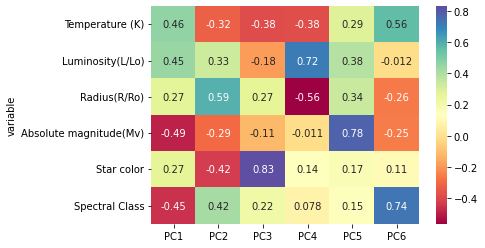

In [ ]:
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_out = PCA().fit(X_st)
num_pc = pca_out.n_features_
loadings = pca_out.components_
pca_scores = PCA().fit_transform(X_st)
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')

df_st =  StandardScaler().fit_transform(X_st)
pca_out = PCA().fit(df_st)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

# Biplot

In [ ]:
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2)
,var2=round(pca_out.explained_variance_ratio_[1]*200, 1), colorlist=target)
# plot to png file


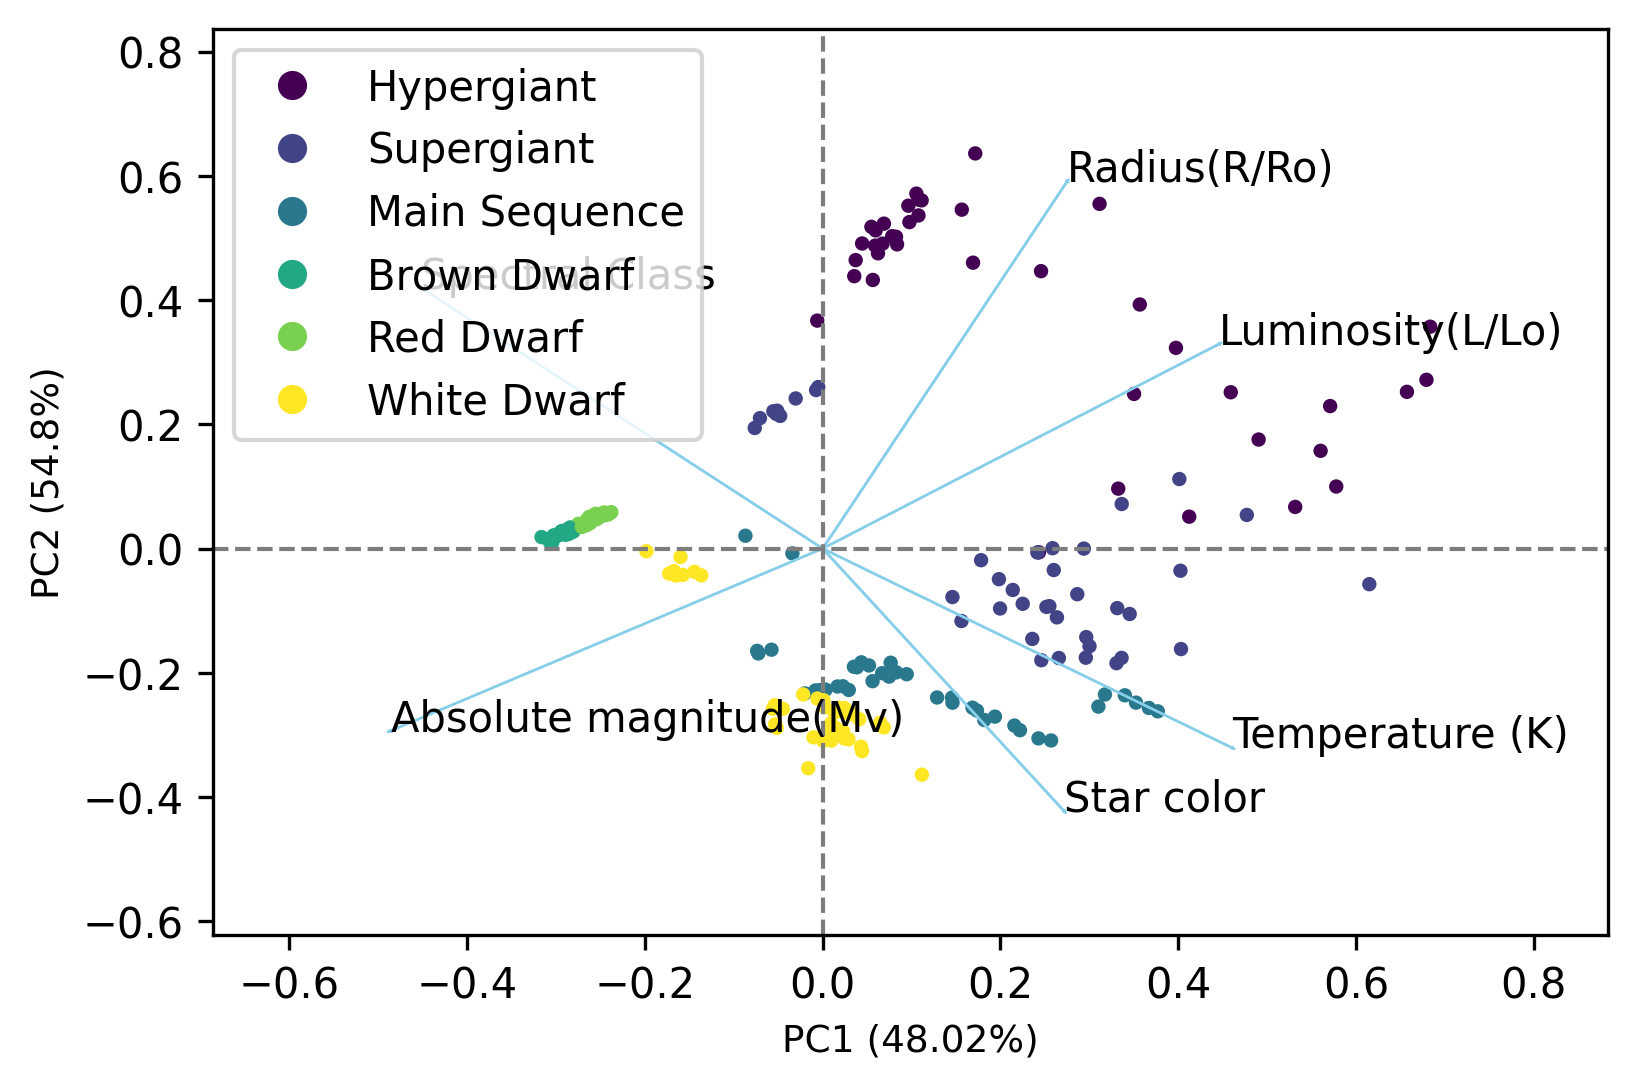

In [ ]:
from PIL import Image

image = Image.open('biplot_2d.png')
image